In [1]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#%%capture
#!wget https://www.dropbox.com/s/im0jixa27aav1do/train.zip
#!wget https://www.dropbox.com/s/lot1946ol8q8u85/test.zip

In [3]:
#zip = ZipFile('train.zip')
#zip.extractall()

#zip = ZipFile('test.zip')
#zip.extractall()

In [4]:
train_path = 'train'
test_path = 'test'

height = 112
width = 112
channels = 3

In [5]:
X_train = []
Y_train = []
X_test_pred = []
Y_test_pred = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

9285

In [6]:
images = os.listdir(train_path)
for a in images:
    image = Image.open(train_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(a.split(' (')[0].lower())

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
set_labels = set(Y_train)
labels = {}
idx = 0
for i in set_labels:
    idx += 1
    labels[i] = idx


In [8]:
Y_train = [labels[i] for i in Y_train]

In [9]:
images = os.listdir(test_path)
for a in images:
    image = Image.open(test_path + '/' + a)
    image = image.resize((height,width))
    image = np.array(image)
    X_test_pred.append(image)
    Y_test_pred.append(a.split(' (')[0].lower())

X_test_pred = np.array(X_test_pred)
Y_test_pred = np.array(Y_test_pred)

In [10]:
Y_test_pred = [labels['green called cattleheart'] if i == 'green celled cattleheart' else labels[i] for i in Y_test_pred]

In [11]:
X_train = np.array(X_train) / 255
X_test_pred = np.array(X_test_pred) / 255
Y_train = np.array(Y_train)
Y_test_pred = np.array(Y_test_pred)

In [12]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
#Y_test_pred= keras.utils.to_categorical(Y_test_pred,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test_pred.shape)

(9285, 9285)
(750,)


In [13]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                        

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42, shuffle=True)

In [17]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )

Epoch 1/15


2023-05-03 19:07:20.700680: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


233/233 [==============================] - 277s 1s/step - loss: 4.5471 - accuracy: 0.0226 - val_loss: 3.9286 - val_accuracy: 0.0662
Epoch 2/15
233/233 [==============================] - 296s 1s/step - loss: 3.4423 - accuracy: 0.1348 - val_loss: 2.9821 - val_accuracy: 0.1998
Epoch 3/15
233/233 [==============================] - 303s 1s/step - loss: 2.7577 - accuracy: 0.2674 - val_loss: 2.1176 - val_accuracy: 0.4292
Epoch 4/15
233/233 [==============================] - 308s 1s/step - loss: 2.2702 - accuracy: 0.3786 - val_loss: 1.7847 - val_accuracy: 0.4933
Epoch 5/15
233/233 [==============================] - 307s 1s/step - loss: 1.9523 - accuracy: 0.4530 - val_loss: 1.7091 - val_accuracy: 0.5342
Epoch 6/15
233/233 [==============================] - 312s 1s/step - loss: 1.7355 - accuracy: 0.5022 - val_loss: 1.3579 - val_accuracy: 0.6155
Epoch 7/15
233/233 [==============================] - 317s 1s/step - loss: 1.5247 - accuracy: 0.5599 - val_loss: 1.2948 - val_accuracy: 0.6457
Epoch 8/15

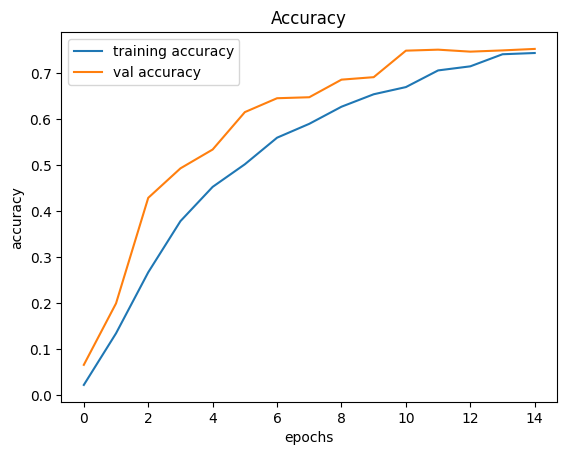

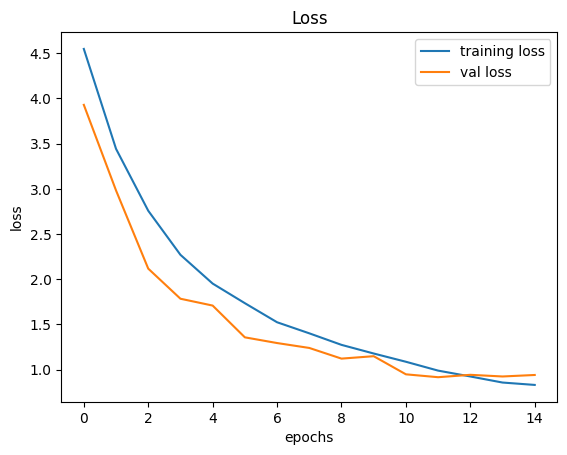

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
pred = model.predict(X_test_pred)
predicted_classes = np.argmax(pred, axis=1)

24/24 [==============================] - 6s 257ms/step


In [23]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(Y_test_pred, predicted_classes)*100)

Test Data accuracy:  78.53333333333333
